# Préparation au TP "synthèse par la méthode bilinéaire"

## I - Etude des différentiateurs


L'exercice 2.1 du polycopié a permit de proposer trois différentiateurs dérivés de 3 intégrateurs permettant d'approcher le comportement de l'opérateur dérivé $D$ et de la variable associée $p$ :
  \begin{equation}
    D =\frac{d}{dt} \leftrightarrow p \leftrightarrow \underbrace{\frac{1}{T_e}(1-z^{-1})}_{\text{Forward Euler}}\leftrightarrow \underbrace{\frac{1}{T_e}(z-1)}_{\text{Backward Euler}} \leftrightarrow \underbrace{\frac{2}{T_e}\frac{1-z^{-1}}{1+z^{-1}}}_{\text{Bilinéaire ou Tustin}} 
  \end{equation}  

Dans la suite nous notons $H_f$, $H_b$ et $H_t$ les fonctions de trasnfert des systmes respectifs "forward", "backward" et "trapezoidal"

### I1 - Récurrences
Voici 4 récurrences qui sont à associer à ces 3 différentiateurs :
\begin{itemize}
\item $ y[k] = \frac{x[k+1]-x[k]}{T_e} $
\item $ \frac{y[k+1] + y[k]}{2} = \frac{x[k+1]-x[k]}{T_e}$
\item $ y[k] = \frac{x[k]-x[k-1]}{T_e} $
\item $ y[k+1] = \frac{x[k+1]-x[k]}{T_e} $
\end{itemize}

Lequel de ces différentiateurs n'est pas causal ?

Voici trois phrases à associer à chacun des différentiateur~:
\begin{itemize}
\item Te fois la sortie à l'instant k vaut l'incrément de l'entrée entre les instants k-1 et k
\item la pente entre l'instant k et k+1 vaut la moyenne de la sortie aux instants k et k+1  
\item Te fois la sortie à l'instant k-1 vaut l'incrément de l'entrée entre les instants k-1 et k
\end{itemize}

### I2 - Réponses harmoniques

Ecrivez les fonctions de transfert en fonction de $z$ et non pas $z^{-1}$ pour obtenir plus facilement l'espression des réponses harmoniques $H(\omega)=H(z)|_{z=e^{i T_e \omega }}$

ASTUCE ! Faites apparaître des cosinus et sinus en factorisant les $e^{i\,\omega\,T_e} \pm 1$ en $e^{\frac{-i\,\omega\,T_e}{2}}(e^{\frac{i\,\omega\,T_e}{2}} \pm e^{\frac{-i\,\omega\,T_e}{2}}) $ et en utilisant les formules d'Euler.

Donnez une expression analytique du module de la réponse harmonique. Elle doit être (c'est un cas particulier de ce différentiateur) purement complexe pour la bilinéaire $H_t$. La forme doit être identique à la phase près pour les deux Euler $H_f$ et $H_b$.

Retrouvez en faisant un équivalent en $\omega=0$ la valeur $G(\omega)=i\omega$ d'un dérivateur (pente de +20 db/decade et phase de +90 degrés). 

En revanche pour la pulsation la plus haute $\omega = \frac{2\pi F_e}{2}$ donnez la valeur du gain et constatez que l'approximation n'est plus correcte.

Voici un code pour vérifier vos calculs de module

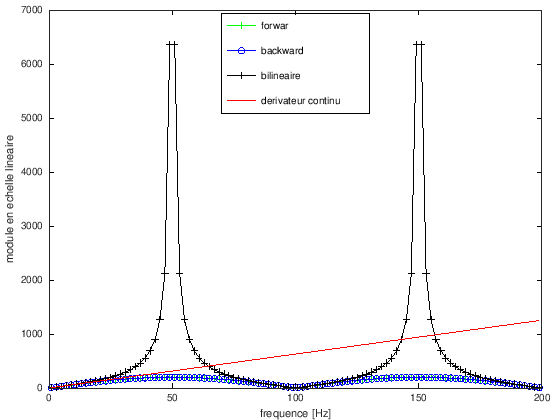

In [27]:
clear all; close all; clc;
Fe=100;Df=1;Te=1/Fe;

% fonctions de transfert (fonctions inline de la variable z VECTORISEE "./")
Hf = @(z) ((z-1)./(z*Te));   % forward Euler ou "zero order hold"
Hb = @(z) ((z-1)./Te)     ;  % backward Euler
Ht = @(z) ((z-1)./(z+1)*2/Te); % bilineaire ou Tustin ou trapezoidale

f=0:Df:2*Fe;         % vecteur des fréquences
w=2*pi*f;            % vecteur des pulsations
p=i*w ;              % Et oui ! vecteur de la variable de Laplace 
z=exp(Te*p);         % encore plus fort : les valeurs de z aux différentes pulsations

% certaines fréquences comme 0 et we/2 donnent 
% des singularités à éviter pour l'afficahge: 
% on fait un vecteur des indices à afficher qui évite
% cela en prenant que les indices pairs
aff=2:2:length(f);
plot(f(aff),abs(Hf(z(aff))),'g+-'); hold on;
plot(f(aff),abs(Hb(z(aff))),'bo-'); 
plot(f(aff),abs(Ht(z(aff))),'k+-'); 
plot(f(aff),abs(p(aff)),'r');
xlabel("frequence [Hz]");
ylabel("module en echelle lineaire")
legend(["forwar";"backward";"bilineaire";"derivateur continu"],"location","north")

Remarquez bien la périodicité des réponses harmoniques. Quelle est la fenêtre de fréquence d'observation de ces systèmes discrets ?

Même dans cette fenêtre d'observation, indiquez dans quelle plage de fréquence les approximations fonctionnent bien ?

On peut utiliser l'échelle log en fréquence et en gain pour mieux observer cette zone :

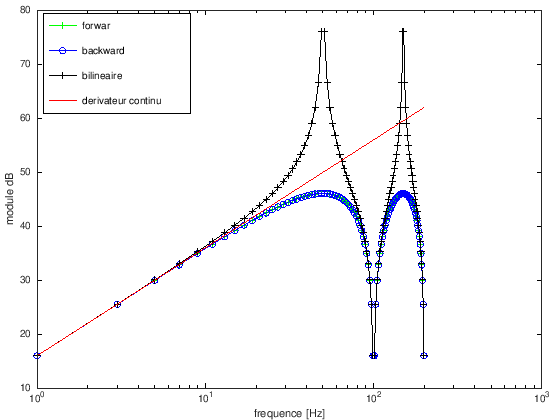

In [31]:
dBde = @(g) 20*log10(abs(g));

semilogx(f(aff),dBde(Hf(z(aff))),'g+-'); hold on;
semilogx(f(aff),dBde(Hb(z(aff))),'bo-'); 
semilogx(f(aff),dBde(Ht(z(aff))),'k+-'); 
semilogx(f(aff),dBde(p(aff)),'r');
xlabel("frequence [Hz]");
ylabel("module dB")
legend(["forwar";"backward";"bilineaire";"derivateur continu"],"location","northwest")

Ce différentiateur fonctionne bien pour des fréquence d'entrée <10 Hz soit Fe/10 !

**Il faudra donc bien choisir Fe > 10 * Fmax avec ces méthodes !** Ce qui a un coût en terme de puissance de calul.
 
Les backward et forward ont des gain identiques, observons que leurs phases diffèrent :

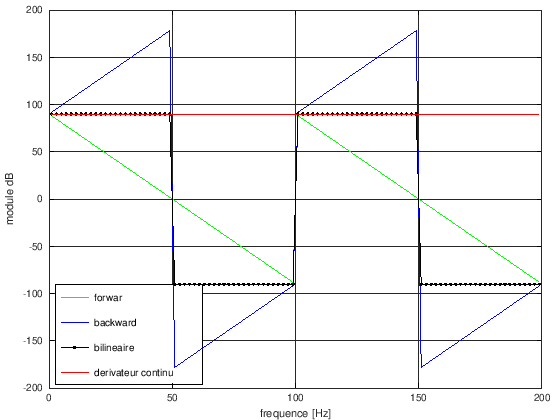

In [39]:
argDeg = @(g) (180/pi*arg(g));

plot(f(aff),argDeg(Hf(z(aff))),'g-'); hold on;
plot(f(aff),argDeg(Hb(z(aff))),'b-'); 
plot(f(aff),argDeg(Ht(z(aff))),'k.-'); 
plot(f(aff),argDeg(p(aff)),'r');grid
xlabel("frequence [Hz]");
ylabel("module dB")
legend(["forwar";"backward";"bilineaire";"derivateur continu"],"location","southwest")

On remarque que le différentiateur bilinéaire à une phase parfaite sur toute la fenêtre d'observation avant d'opérer un changement de signe au-delà de Fe/2. La phase du zéro complète celle du pôle à 90 degré car ils sont diamétralement opposé sur le cercle unité (voir interprétation géométrique de la réponse harmonique). 

Le forward lui a une courbe de phase qui est typiqement celle d'un **retard de Te/2** alors que

Le backward lui a une courbe de phase qui est typiquement celle d'une **avance de Te/2** : on retrouve l'aspect "non-causal" de ce différentiateur.

### I3 - Réponse impulsionnelle (si vous avez le temps)

La réponse impulsionnelle du forward et backward est immédiate dès que l'on remarque que la fonction de transfert est déjà sous la forme d'une transformée en Z : $\sum a(n)z^{-n}$. Retrouvez le résultat sur la causalité de ces filtres, sont ils à réponse impulsionnelle finie (FIR) ou infinie (IIR) ?

Obtenez la réponse impulsionnelle de $h_t$ par division en puissances croissante de $z^{-1}$, ce filtre est il causal, FIR ou IIR ? 

On trouve ainsi des approximations de la dérivée d'un dirac lorsque $Te\to 0$...


On peut vérifier ces réponses impulsionnelles en faisant la transformée inverse de la fonction de transfert. En théorie on doit faire une TFSD inverse sur toutes les fréquences continues entre 0 et Fe car la réponse impulsionnelle est à support temporel infini dans le cas général. Dans le cas pratique on a un certain nombre de points en fréquences $N=F_e/\Delta_f$ et en temps et opérons donc à des TFD et TFD inverse pour obtenir un signal de période N !

Utilisons donc ifft et fft.


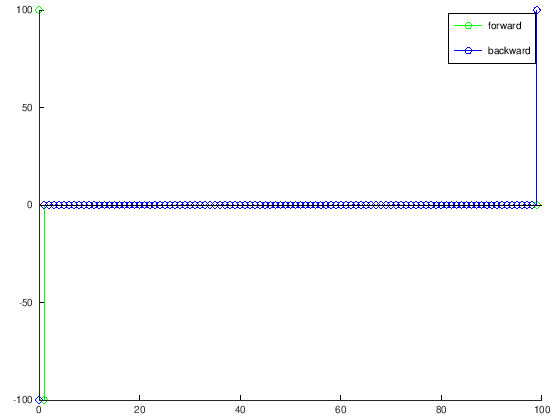

In [95]:
N = Fe/Df;
k=0:(N-1);
stem(k,ifft(Hf(z(1:(Fe/Df)))),'g'); hold on;
stem(k,ifft(Hb(z(1:(Fe/Df)))),'b'); 
legend("forward","backward");

Et oui le signal est rendu périodique sans trop de casse. Si l'on veut observer les temps négatifs pour notre filtre non causal, on peut utiliser la fonction ||fftshift|| qui coupe la dernière moitiée (l'alias) et la mets au début. 

Ce qui donne en affichant les valeurs négatives du signal périodique :

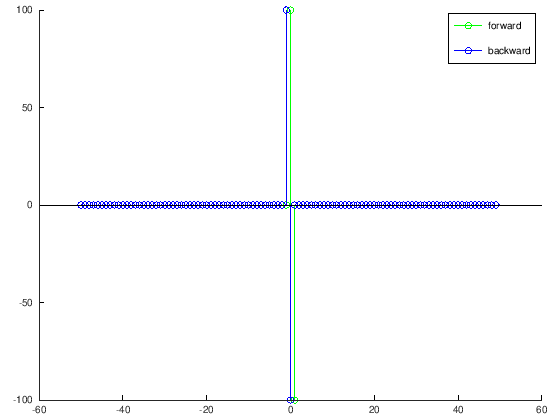

In [96]:
k=k-N/2;
stem(k,fftshift(ifft(Hf(z(1:(Fe/Df))))),'g'); hold on;
stem(k,fftshift(ifft(Hb(z(1:(Fe/Df))))),'b'); 
legend("forward","backward");

On observe donc bien les réponse impulsionnelles finies rendues périodiques dans le temps par notre échantillonnage de N points en fréquence. Ce qui n'as pas d'impact et permet d'utiliser la FFT à la place de la TFSD sans casse.

En revanche pour une réponse impulsionnelle infinie cela pose problème car les recopies périodiques se superposent et s'ajoutent ! **On a du repliement mais temporel** 

Observons donc la réponse impulsionnelle nulle pour $k<0$ et telle que $\frac{T_e}{2}. h_t[k] = 2.(-1)^k + \delta_0[k] \leftrightarrow (1, -2, 2, -2, \dots)$, mais rendue périodique avec effet de repliement temporel :

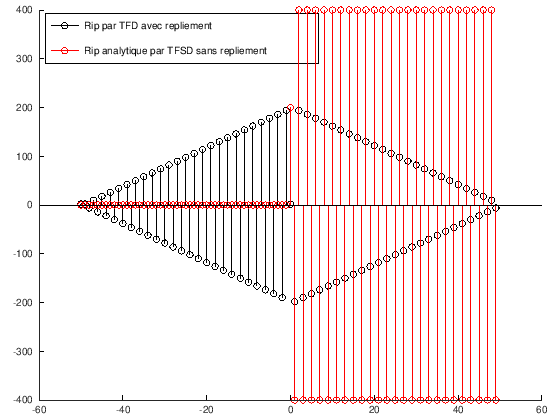

In [97]:
stem(k,fftshift(ifft(Ht(z(1:(Fe/Df))))),'k'); hold on;
ht = 2/Te*(k>=0) .* (2*(-1).^k -(k==0)) ;
stem(k,ht,'r');
legend("Rip par TFD avec repliement","Rip analytique par TFSD sans repliement","location","northwest")

On peut toujours se rassurer et utiliser la récurrence pour trouver la réponse impulsionnelle !

Ce qui donne

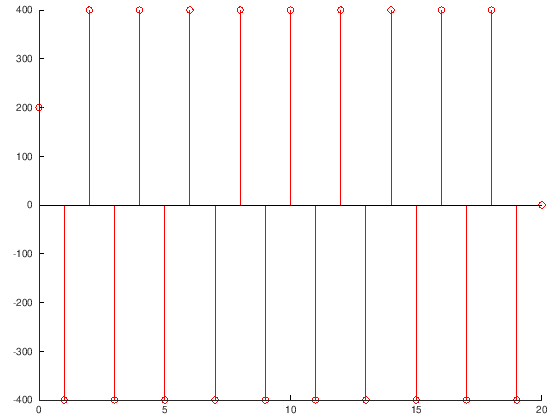

In [98]:
k=0:20 ;
x = (k==0) ; % impulsion unité (vrai = 1, faux = 0)
y = zeros(1,21);

y(1) = x(1)/Te*2 ; % première itération

for id=2:length(k)-1 
    y(id) = -y(id-1) + (x(id)-x(id-1))/Te*2 ;
end
stem(k,y,'r'); hold on



### I4 - Avec la boite à outils "control" 

Il est possible d'utiliser la boîte à outils "control" pour obtenir ces affichages en quelques lignes de code.
Remarquons que ces fonctions n'ont rien d'indispensable puisque nous avons pu tout faire avec des fonctions basiques et quelques conaissances théoriques. 

Donc on peut utiliser les même fonctions qu'en continu:
 - tf(num,den,Te) : pour definir un système par sa fonction de transfert
 - bode
 - impulse 
 - pzmap


In [104]:
pkg load control %% pour octave uniquement, inutile avec matlab

% si tf reçoit un troisième argument alors c'est Te
%    et tf contruit un système discret
% coef des polynomes en z ! pas z^-1
backward=tf([1 -1]/Te , [1],Te) 
        %   (z -1)/Te /  1   = (z-1)/Te = Hb

forward=tf([1 -1]/Te ,[1 0],Te) 
        %  (z -1)/Te / z     = (1-z^-1)/Te = Hf

tustin= tf(2*[1 -1]/Te , [1 1],Te) 
        %  2 (z -1)/Te / (z+1)     = Ht

% système continu celui là!
derivateur = tf([1 0],[1])


Transfer function 'backward' from input 'u1' to output ...

 y1:  100 z - 100

Sampling time: 0.01 s
Discrete-time model.

Transfer function 'forward' from input 'u1' to output ...

      100 z - 100
 y1:  -----------
           z     

Sampling time: 0.01 s
Discrete-time model.

Transfer function 'tustin' from input 'u1' to output ...

      200 z - 200
 y1:  -----------
         z + 1   

Sampling time: 0.01 s
Discrete-time model.

Transfer function 'derivateur' from input 'u1' to output ...

 y1:  s

Continuous-time model.


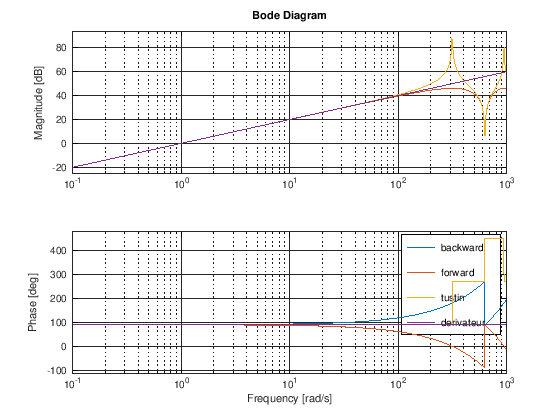

In [107]:
bode(backward,forward,tustin,derivateur)

**Critiquons l'outils !**
- Ne vous faites pas avoir, les anglais semblent confondre fréquence et pulsation sur ce coup.
- Les modulo $2\pi$ sur la phase sont gérés de manière surprenante surtout pour la bilinéaire.
- La fréquence d'échantillonnage et de Nyquist $Fe/2$ ne sont pas clairement indiqué.

Voyons les réponses temporelles

ça passe pour forward et tustin

 en revanche pour backward...

error: ss: dss2ss: this descriptor system cannot be converted to regular state-space form
error: called from
    __dss2ss__ at line 33 column 7
    ssdata at line 58 column 14
    __time_response__>__impulse_response__ at line 308 column 8
    __time_response__ at line 136 column 12
    impulse at line 74 column 10


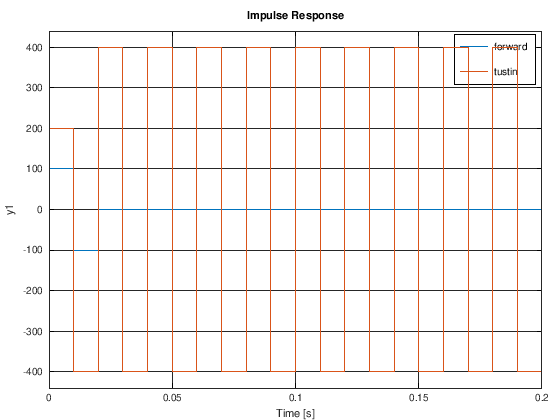

In [122]:
impulse(forward,tustin,T=k*Te)
disp("ça passe pour forward et tustin")
disp("\n en revanche pour backward...\n")
impulse(backward,tustin,T=k*Te)


**Critiquons l'outils**
- Il sait pas tracer les RIP des systèmes non casaux (message d'erreur pour backward)! Le NASE !
- Alors que le signal est discret il affiche une fonction en escalier ! Théoriquement môche ça ! C'est comme si le signal était maintenu pendant une durée Te : on parle de bloqueur d'ordre zero (zero order hold en Anglais). 

## II - Synthèse à partir du continu par la transformation bilinéaire

On désire adapter un filtre du second ordre continu de la forme 

$G(p) = \frac{\omega_n^2}{p^2+ 2\zeta\omega_n\,p+{\omega_n}^2}$





Transfer function 'second' from input 'u1' to output ...

             3.948e+07        
 y1:  ------------------------
      s^2 + 1257 s + 3.948e+07

Continuous-time model.


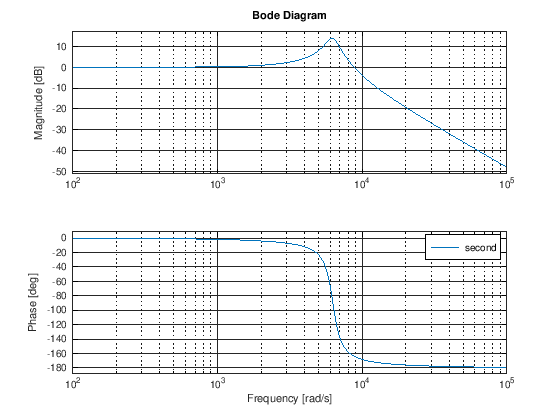

In [137]:
wn=1000*2*pi;
zeta = 0.1; 
second=tf([wn^2],[1 2*zeta*wn wn^2])
bode(second)

Pour cela nous approchons l'opérateur dérivé par les 3 forme de différentiateurs étudiés précédemment.

Calculez analytiquement les fonctions de transfert par substituion de l'opérateur p en système discret:
- $G_f(z)=G\left(p=\frac{1-z^{-1}}{T_e}\right)$
- $G_b(z)=G\left(p=\frac{z-1}{T_e}\right)$
- $G_t(z)=G\left(p=\frac{2}{T_e}\frac{z-1}{z+1}\right)$

Effectuez les vérifications :
- pour $\omega=0$, en remplaçant z par 1 ($z=e^0=1$) on doit avoir $G_i(z=1)=G(f=0)=1$ car on sait que l'approximation fonctionne pour $\omega << F_e/2$
- les coefficients doivent être homogènes en dimension ( p ~ $\omega$ et z est sans dimention)

Donnez l'équation aux différences de chacun de ces systèmes et vérifiez l'homogénéité des coefficients.

On peut vérifier numériquement les résultats pour la transformée bilinéaire qui peut être calculée avec la commande "c2d" pour "continuous to discrete".


Transfer function 'second' from input 'u1' to output ...

              3948        
 y1:  --------------------
      s^2 + 12.57 s + 3948

Continuous-time model.

Transfer function 'Gt' from input 'u1' to output ...

      0.08497 z^2 + 0.1699 z + 0.08497
 y1:  --------------------------------
           z^2 - 1.552 z + 0.8918     

Sampling time: 0.01 s
Discrete-time model.

Transfer function 'Gf' from input 'u1' to output ...

        0.1833 z + 0.1757   
 y1:  ----------------------
      z^2 - 1.523 z + 0.8819

Sampling time: 0.01 s
Discrete-time model.


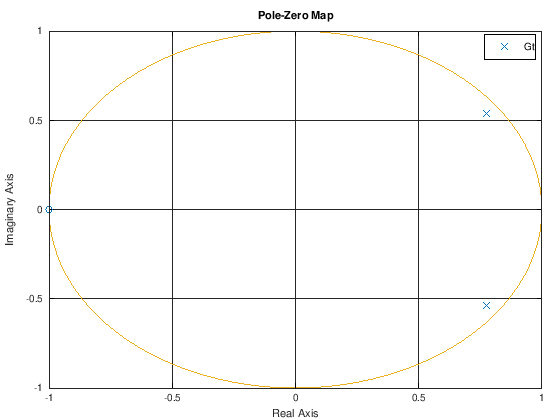

In [164]:
wn=2*pi*10;
zeta = 0.1; 
second=tf([wn^2],[1 2*zeta*wn wn^2])
Fe=100;Te=1/Fe;
Gt=c2d(second,Te,'bilinear')
Gf=c2d(second,Te,'zoh')
pzmap(Gt); hold on;
z=exp(i*2*pi*(0:1:100)/100);
plot(real(z),imag(z))

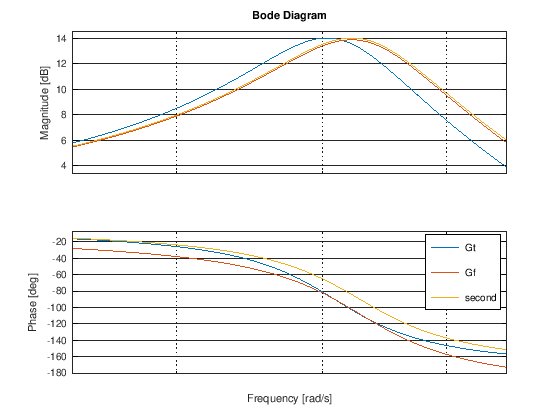

In [165]:
bode(Gt,Gf,second,W=2*pi*(7:0.01:12))

In [155]:
help bode

'bode' is a function from the file /usr/share/octave/packages/control-3.0.0/bode.m

 -- Function File: bode (SYS)
 -- Function File: bode (SYS1, SYS2, ..., SYSN)
 -- Function File: bode (SYS1, SYS2, ..., SYSN, W)
 -- Function File: bode (SYS1, 'STYLE1', ..., SYSN, 'STYLEN')
 -- Function File: [MAG, PHA, W] = bode (SYS)
 -- Function File: [MAG, PHA, W] = bode (SYS, W)
     Bode diagram of frequency response.  If no output arguments are
     given, the response is printed on the screen.

     *Inputs*
     SYS
          LTI system.  Must be a single-input and single-output (SISO)
          system.
     W
          Optional vector of frequency values.  If W is not specified,
          it is calculated by the zeros and poles of the system.
          Alternatively, the cell '{wmin, wmax}' specifies a frequency
          range, where WMIN and WMAX denote minimum and maximum
          frequencies in rad/s.
     'STYLE'
          Line style and color, e.g.  'r' for a solid red line or '-.k'
  